# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Marchelino Benediktus Leintan]
- **Email:** [maje308@gmail.com]
- **ID Dicoding:** [marsel_tan_9otz]

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Di Musim manakah yang paling banyak untuk menyewa sepeda?
- Penyewa apa yang paling banyak antara Registered dan Casual di 2011 dan 2012?
- Pada Hari apa yang lebih banyak menyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
pip install numpy pandas scipy matplotlib seaborn jupyter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
  Attempting unins

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
#Membaca data day.csv
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#Membaca data hour.csv
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- **Membaca Dataset**: Baris kode pd.read_csv("day.csv") membaca data dari file CSV bernama day.csv dan menyimpannya ke dalam DataFrame bernama day_df.
-**Preview Data Awal**: day_df.head() menampilkan lima baris pertama dari dataset untuk mendapatkan gambaran awal dari struktur data.
-**Struktur Data**: Melalui output head(), kita dapat melihat nama kolom, tipe data, dan contoh nilai dalam dataset. Ini sangat membantu untuk memahami data apa saja yang tersedia.
-**Kualitas dan Konsistensi**: Dengan melihat data awal, kita bisa segera melihat jika ada nilai yang hilang atau terlihat tidak sesuai, yang nantinya dapat memerlukan pembersihan data lebih lanjut.

### Assessing Data

**Menilai Data day.csv**

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
# Memeriksa value yang hilang
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
# Memeriksa dan menampilkan duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
# Memeriksa parameter statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Menilai data hour.csv**

In [ ]:
hour_df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# Memeriksa value yang hilang
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
# Memeriksa dan menampilkan duplikasi data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
# Memeriksa parameter statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak didapati adanya data yang hilang, duplikat data, dan nilai yang tidak akurat
- Terdapat kesalahan Dtype pada data hour.csv yang dimana dteday harusnya datetime tetapi di tuliskan dengan tipe sebagai object
- Struktur Data
  day_df:
  Dataset ini memiliki informasi tentang penyewaan sepeda harian.
  Kolom dan tipe data yang relevan mencakup variabel seperti season, holiday, cnt, dll.
  Tidak ada nilai yang hilang (isna().sum() menunjukkan hasil nol).
  hour_df:

  Dataset ini memberikan detail penyewaan sepeda berdasarkan jam.
  Kolom dan tipe data yang relevan mencakup variabel seperti weathersit, temp, cnt, dll.
Sama seperti day_df, tidak ada nilai yang hilang.


### Cleaning Data

**Memperbaiki tipe data dteday object menjadi datetime**

In [ ]:
# Mengonversi kolom datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])
    hour_df[column] = pd.to_datetime(hour_df[column])

In [ ]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
# Mengganti nilai kolom season: 1 menjadi Spring, 2 menjadi Summer, 3 menjadi Fall, dan 4 menjadi Winter
day_df['season'] = day_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Mengubah nilai kolom month: 1 menjadi Jan, 2 menjadi Feb, dan seterusnya hingga 12 menjadi Dec
day_df['mnth'] = day_df['mnth'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

# Mengonversi nilai kolom year: 0 menjadi 2011 dan 1 menjadi 2012
day_df['yr'] = day_df['yr'].replace({0: '2011', 1: '2012'})

# Mengubah nilai kolom holiday: 0 menjadi not on holiday, dan 1 menjadi holiday
day_df['holiday'] = day_df['holiday'].replace({0: 'Not on holiday', 1: 'Holiday'})


# Menampilkan 5 baris pertama dari DataFrame
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,Not on holiday,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,Not on holiday,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,Not on holiday,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,Not on holiday,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,Not on holiday,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Mengganti nilai kolom season: 1 menjadi Spring, 2 menjadi Summer, 3 menjadi Fall, dan 4 menjadi Winter
hour_df['season'] = hour_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Mengubah nilai kolom month: 1 menjadi Jan, 2 menjadi Feb, dan seterusnya hingga 12 menjadi Dec
hour_df['mnth'] = hour_df['mnth'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

# Mengonversi nilai kolom year: 0 menjadi 2011 dan 1 menjadi 2012
hour_df['yr'] = hour_df['yr'].replace({0: '2011', 1: '2012'})

# Mengubah nilai kolom holiday: 0 menjadi not on holiday, dan 1 menjadi holiday
hour_df['holiday'] = hour_df['holiday'].replace({0: 'Not on holiday', 1: 'Holiday'})

# Menampilkan 5 baris pertama dari DataFrame
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Not on holiday,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,Not on holiday,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,Not on holiday,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,Not on holiday,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,Not on holiday,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kolom dteday dikonversi menjadi tipe datetime, mempermudah analisis berbasis waktu seperti tren musiman dan pola harian.
- Nilai numerik pada kolom season, mnth, yr, dan holiday diganti dengan label deskriptif seperti Spring, Jan, 2011, dan Holiday, sehingga lebih mudah dipahami.
- Transformasi ini mempermudah interpretasi data, khususnya bagi pengguna non-teknis, tanpa perlu memahami kode angka.
- Data yang berlabel mendukung pembuatan visualisasi yang lebih informatif, seperti grafik musiman atau pie chart berdasarkan hari libur.
- Format data yang seragam antara day_df dan hour_df memungkinkan analisis lintas dataset yang lebih efisien.

## Exploratory Data Analysis (EDA)

### Explore data day_df

In [ ]:
# Merangkum parameter statistik
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Jan,Not on holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
#Kelompokkan data day penyewa sepeda berdasarkan season
day_df.groupby(by='season').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                            
         max   min         mean      sum
season                                  
Fall    8714  1115  5644.303191  1061129
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Winter  8555    22  4728.162921   841613

In [ ]:
#Kelompokkan data day penyewa sepeda berdasarkan tahun
day_df.groupby(by='yr').agg({
    'registered': 'sum', 'casual': 'sum', 'cnt':'sum'
})

,registered,casual,cnt
yr,,,
2011,995851,247252,1243103
2012,1676811,372765,2049576


In [ ]:
#Kelompokkan data day penyewa sepeda berdasarkan bulan
day_df.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
}).sort_values(by=('mnth'))

cnt                           
       max   min         mean     sum
mnth                                 
Apr   7460   795  4484.900000  269094
Aug   7865  1115  5664.419355  351194
Dec   6606   441  3403.806452  211036
Feb   5062  1005  2655.298246  151352
Jan   4521   431  2176.338710  134933
Jul   8173  3285  5563.677419  344948
Jun   8120  3767  5772.366667  346342
Mar   8362   605  3692.258065  228920
May   8294  2633  5349.774194  331686
Nov   6852  1495  4247.183333  254831
Oct   8156    22  5199.225806  322352
Sep   8714  1842  5766.516667  345991

In [ ]:
#Kelompokkan data hour penyewa sepeda berdasarkan bulan
hour_df.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
}).sort_values(by=('mnth'))

cnt                        
      max min        mean     sum
mnth                             
Apr   822   1  187.260960  269094
Aug   941   1  238.097627  351194
Dec   759   1  142.303439  211036
Feb   610   1  112.865026  151352
Jan   559   1   94.424773  134933
Jul   913   1  231.819892  344948
Jun   900   1  240.515278  346342
Mar   957   1  155.410726  228920
May   873   1  222.907258  331686
Nov   729   1  177.335421  254831
Oct   963   1  222.158511  322352
Sep   977   1  240.773138  345991

In [ ]:
#Kelompokkan penyewa sepeda berdasarkan Libur
day_df.groupby(by='holiday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                            
                 max   min         mean      sum
holiday                                         
Holiday         7403  1000  3735.000000    78435
Not on holiday  8714    22  4527.104225  3214244

**Insight:**
- Parameter Statistik: Data day_df memberikan informasi lengkap tentang jumlah penyewaan sepeda, dengan statistik seperti maksimum, minimum, rata-rata, dan total untuk berbagai kategori.
- Berdasarkan Musim (Season): Musim seperti Summer dan Fall memiliki penyewaan lebih tinggi, menunjukkan pengaruh cuaca terhadap tren penyewaan.
- Berdasarkan Tahun: Tahun 2012 menunjukkan peningkatan penyewaan dibandingkan 2011, baik untuk registered maupun casual.
- Berdasarkan Bulan: Bulan-bulan seperti Jul dan Aug menunjukkan penyewaan tertinggi, sementara bulan dingin seperti Jan lebih rendah.
- Berdasarkan Hari Libur: Penyewaan lebih tinggi pada hari biasa dibandingkan hari libur, mengindikasikan lebih banyak penggunaan sepeda untuk aktivitas sehari-hari.
- Berdasarkan Data Jam (hour_df): Tren bulanan pada data jam mirip dengan data harian, dengan bulan musim panas memiliki penyewaan lebih tinggi.

## Visualization & Explanatory Analysis

###Pertanyaan 1: Bagaimana performa penyewaan sepeda dalam beberapa Bulan terakhir?

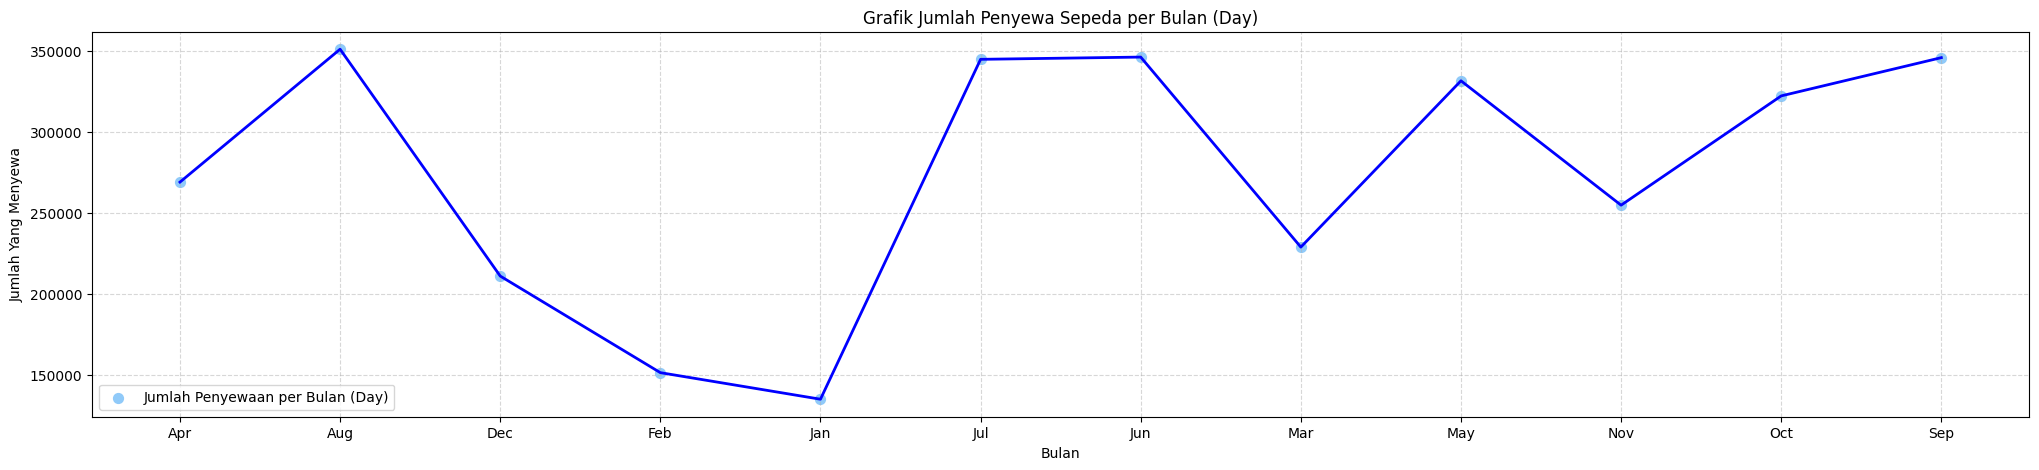

In [ ]:
import matplotlib.pyplot as plt

# Set ukuran figure menjadi lebar (25, 5) untuk tampilan yang lebih luas
plt.figure(figsize=(25, 5))

# Hitung nilai jumlah penyewa sepeda per bulan dari kolom 'cnt' di DataFrame 'day_df'
month_counts_day = day_df['cnt'].groupby(day_df['mnth']).sum()

# Buat scatter plot untuk jumlah penyewa sepeda per bulan dari 'day_df'
plt.scatter(month_counts_day.index, month_counts_day.values, c="#90CAF9", s=50, marker='o', label='Jumlah Penyewaan per Bulan (Day)')

# Buat line plot untuk menghubungkan titik-titik pada jumlah penyewa sepeda per bulan dari 'day_df'
plt.plot(month_counts_day.index, month_counts_day.values, color='blue', linewidth=2)

# Menambahkan label untuk sumbu X
plt.xlabel('Bulan')

# Menambahkan label untuk sumbu Y
plt.ylabel('Jumlah Yang Menyewa')

# Menambahkan judul grafik
plt.title('Grafik Jumlah Penyewa Sepeda per Bulan (Day)')

# Menampilkan legenda untuk scatter plot
plt.legend()

# Menambahkan grid dengan gaya garis putus-putus untuk memperjelas tampilan plot
plt.grid(True, linestyle='--', alpha=0.5)

# Menampilkan grafik
plt.show()


### Pertanyaan 2: Untuk 1 musim, minimal ada berapa penyewa yang menyewakan sepeda?

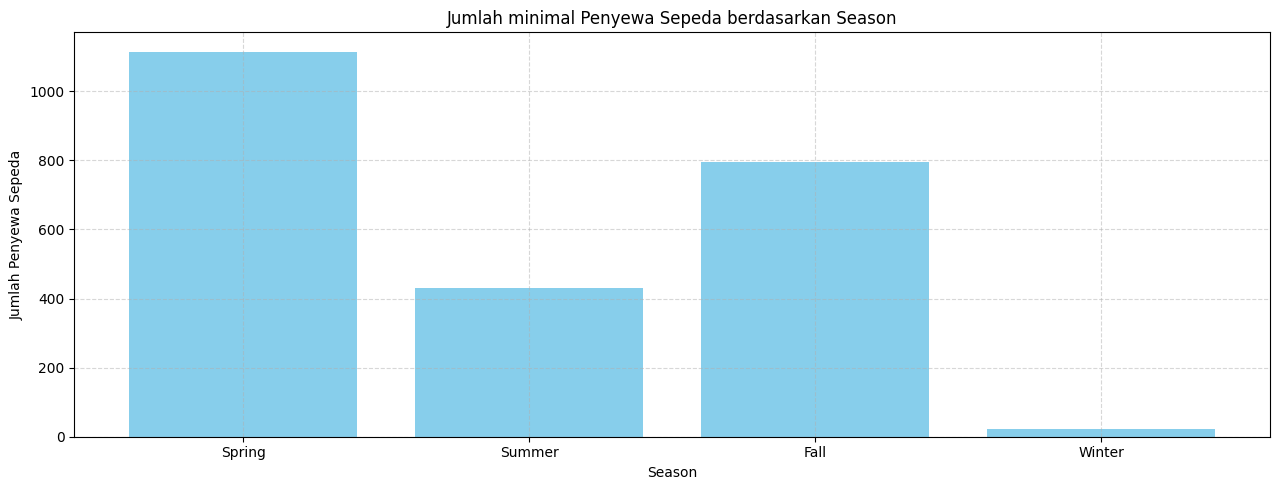

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set ukuran figure
plt.figure(figsize=(25, 5))

# Plot pertama untuk day_df
plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, posisi pertama
plt.bar(day_df['season'].unique(), day_df.groupby('season')['cnt'].min(), color='skyblue')
plt.xlabel('Season')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.title('Jumlah minimal Penyewa Sepeda berdasarkan Season')
plt.grid(True, linestyle='--', alpha=0.5)

# Menampilkan grafik
plt.tight_layout()
plt.show()

###Pertanyaan 3: Penyewa apa yang paling banyak antara Registered dan Casual di tahun 2011 dan 2012?

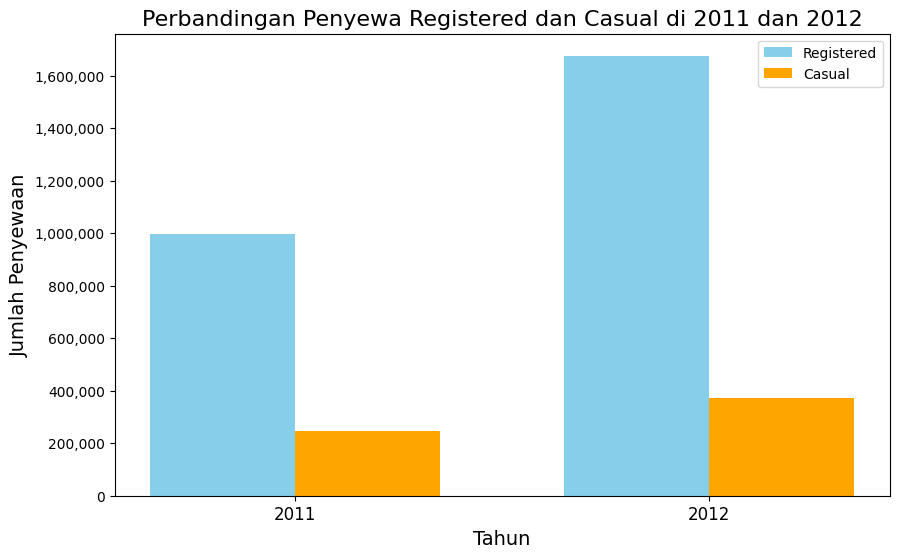

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah penyewaan untuk registered dan casual per tahun
registered_counts = day_df.groupby("yr")["registered"].sum()
casual_counts = day_df.groupby("yr")["casual"].sum()

# Membuat data tahun sebagai kategori
years = ["2011", "2012"]

# Mengatur ukuran figure
fig, ax = plt.subplots(figsize=(10, 6))

# Membuat bar plot untuk registered dan casual
bar_width = 0.35
index = range(len(years))

# Plot untuk penyewa registered
ax.bar([i - bar_width/2 for i in index], registered_counts, width=bar_width, color="skyblue", label="Registered")

# Plot untuk penyewa casual
ax.bar([i + bar_width/2 for i in index], casual_counts, width=bar_width, color="orange", label="Casual")

# Mengatur judul dan label
ax.set_title("Perbandingan Penyewa Registered dan Casual di 2011 dan 2012", fontsize=16)
ax.set_xlabel("Tahun", fontsize=14)
ax.set_ylabel("Jumlah Penyewaan", fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(years, fontsize=12)

# Mengatur format tampilan sumbu y agar menampilkan angka asli
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Menampilkan legenda
ax.legend()

# Menampilkan plot
plt.show()


###Pertanyaan 4: Pada Hari apa yang lebih banyak menyewa sepeda?

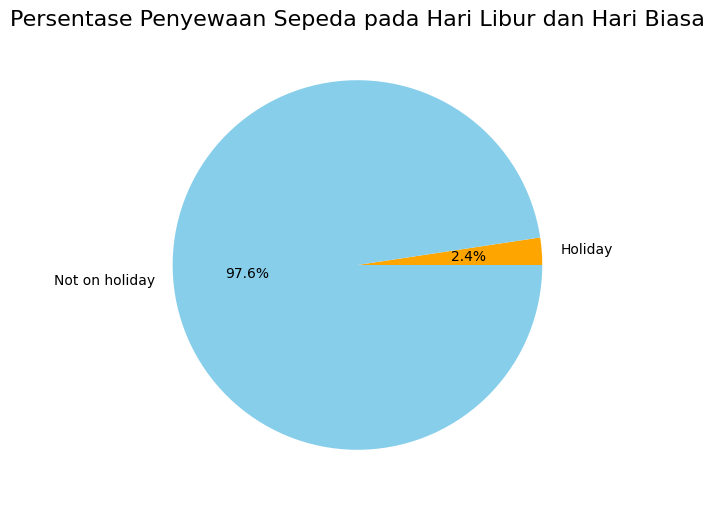

In [ ]:
import matplotlib.pyplot as plt

# Menghitung total penyewaan untuk setiap kategori hari (Holiday dan Not on holiday)
total_rentals_by_holiday = day_df.groupby('holiday')['cnt'].sum()

# Membuat pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(total_rentals_by_holiday, labels=total_rentals_by_holiday.index, autopct='%1.1f%%', colors=['orange', 'skyblue'])

# Mengatur judul
ax.set_title("Persentase Penyewaan Sepeda pada Hari Libur dan Hari Biasa", fontsize=16)

# Menampilkan pie chart
plt.show()


## Analisis Lanjutan

<ipython-input-27-ae27c974b7d3>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = day_df.groupby(['temp_group', 'hum_group'])['cnt'].sum()


temp_group  hum_group         
Very Low    Low Humidity               0
            Medium Humidity        31941
            High Humidity          15891
            Very High Humidity      4638
Low         Low Humidity            6737
            Medium Humidity       161888
            High Humidity         398701
            Very High Humidity    153581
Medium      Low Humidity           12026
            Medium Humidity       191621
            High Humidity         497059
            Very High Humidity    381715
High        Low Humidity               0
            Medium Humidity       220783
            High Humidity         822753
            Very High Humidity    392722
Name: cnt, dtype: int64


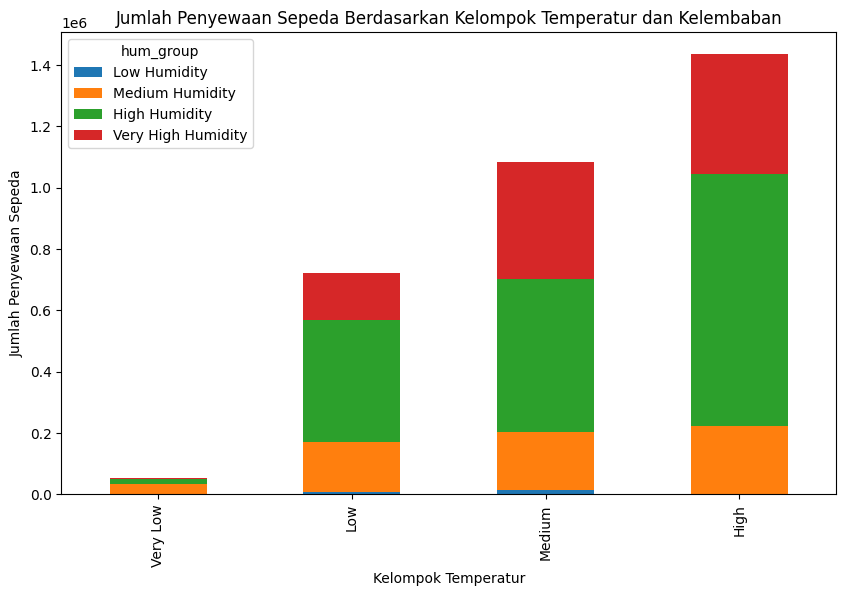

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Mengelompokkan berdasarkan temperatur dan kelembaban

# Mengelompokkan temperatur (temp) menjadi kategori
day_df['temp_group'] = pd.cut(day_df['temp'], bins=[0, 0.2, 0.4, 0.6, 1.0], labels=["Very Low", "Low", "Medium", "High"])

# Mengelompokkan kelembaban (hum) menjadi kategori
day_df['hum_group'] = pd.cut(day_df['hum'], bins=[0, 0.3, 0.5, 0.7, 1.0], labels=["Low Humidity", "Medium Humidity", "High Humidity", "Very High Humidity"])

# Mengelompokkan berdasarkan kategori yang sudah dibuat dan menghitung total 'cnt' penyewaan sepeda
grouped = day_df.groupby(['temp_group', 'hum_group'])['cnt'].sum()

# Menampilkan hasil pengelompokan berdasarkan 'temp_group' dan 'hum_group'
print(grouped)

# Visualisasi hasil pengelompokan
grouped.unstack().plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Kelompok Temperatur dan Kelembaban')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xlabel('Kelompok Temperatur')
plt.show()

In [ ]:
day_df.to_csv("all_data.csv", index=False)

## Conclusion

Pertanyaan
- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Di Musim manakah yang paling banyak untuk menyewa sepeda?
- Penyewa apa yang paling banyak antara Registered dan Casual di 2011 dan 2012?
- Pada Hari apa yang lebih banyak menyewa sepeda?

Conclusion No 1 : performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir terjadi Peningkatan mulai dari bulan januari hingga september lalu pada bulan oktober hingga desember mulai mengalami penurunan.

Conclusion No 2 : Antara 4 musim yang dianalisis, musim 1 (spring) paling banyak untuk menyewa sepeda.

Conclusion No 3 : Antara Registered dan Casual, Pada tahun 2011 pengguna registered lebih banyak menyewa dibanding dengan penyewa casual hingga 2012 pun pengguna registered semakin banyak yang menyewa.

Conclusion No 4 : Di Waktu kerja (not on holiday), lebih banyak pengguna menyewa sepeda dibanding hari libur (holiday).